In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [38]:
dataset = pd.read_csv('data/used_car_dataset.csv')
dataset

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,18924.0,2017.0,ford,good,4 cylinders,gas,122612.0,automatic,sedan,silver,3588,2.202934,0.212334,b
9993,4248.0,2002.0,ford,like new,6 cylinders,gas,NaN,automatic,sedan,silver,157,2.147843,0.070923,a
9994,26269.0,2017.0,ford,excellent,6 cylinders,gas,52541.0,automatic,SUV,white,1499,2.392569,0.094751,c
9995,6149.0,2013.0,ford,good,4 cylinders,gas,197000.0,automatic,SUV,black,180,2.269796,0.129762,a


In [39]:
dataset.describe()

,price,year,odometer,F1,F2,F3
count,9997.000000,9997.000000,9.331000e+03,9997.000000,9997.000000,9997.000000
mean,14262.349305,2009.814144,1.120436e+05,1523.945584,2.225496,0.099283
std,12520.818169,8.862341,8.055942e+04,2090.438720,0.227250,0.100833
min,0.000000,1922.000000,0.000000e+00,4.000000,0.167352,-0.313948
25%,5643.000000,2007.000000,6.653300e+04,311.000000,2.133806,0.029968
50%,10463.000000,2012.000000,1.100000e+05,717.000000,2.255670,0.099648
75%,19464.000000,2015.000000,1.500000e+05,1966.000000,2.362382,0.167504
max,402498.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9331 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [41]:
print("Number of unique values in each column:")
print(dataset.nunique())
# print(dataset['manufacturer'].value_counts())
# print(dataset['fuel'].value_counts())
# print(dataset['condition'].value_counts())
# print(dataset['transmission'].value_counts())
# print(dataset['type'].value_counts())
# print(dataset['paint_color'].value_counts())

Number of unique values in each column:
price           8174
year              89
manufacturer       2
condition          4
cylinders          3
fuel               1
odometer        4681
transmission       2
type               4
paint_color        5
F1              2931
F2              9997
F3              9997
F4                 3
dtype: int64


In [42]:
print(dataset.isnull().sum())

price             0
year              0
manufacturer      0
condition         0
cylinders         0
fuel              0
odometer        666
transmission      0
type              0
paint_color       0
F1                0
F2                0
F3                0
F4                0
dtype: int64


All vehicles have fuel type 'gas' so we can remove this column.

In [43]:
dataset = dataset.drop(columns=['fuel'])
dataset.head()

,price,year,manufacturer,condition,cylinders,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


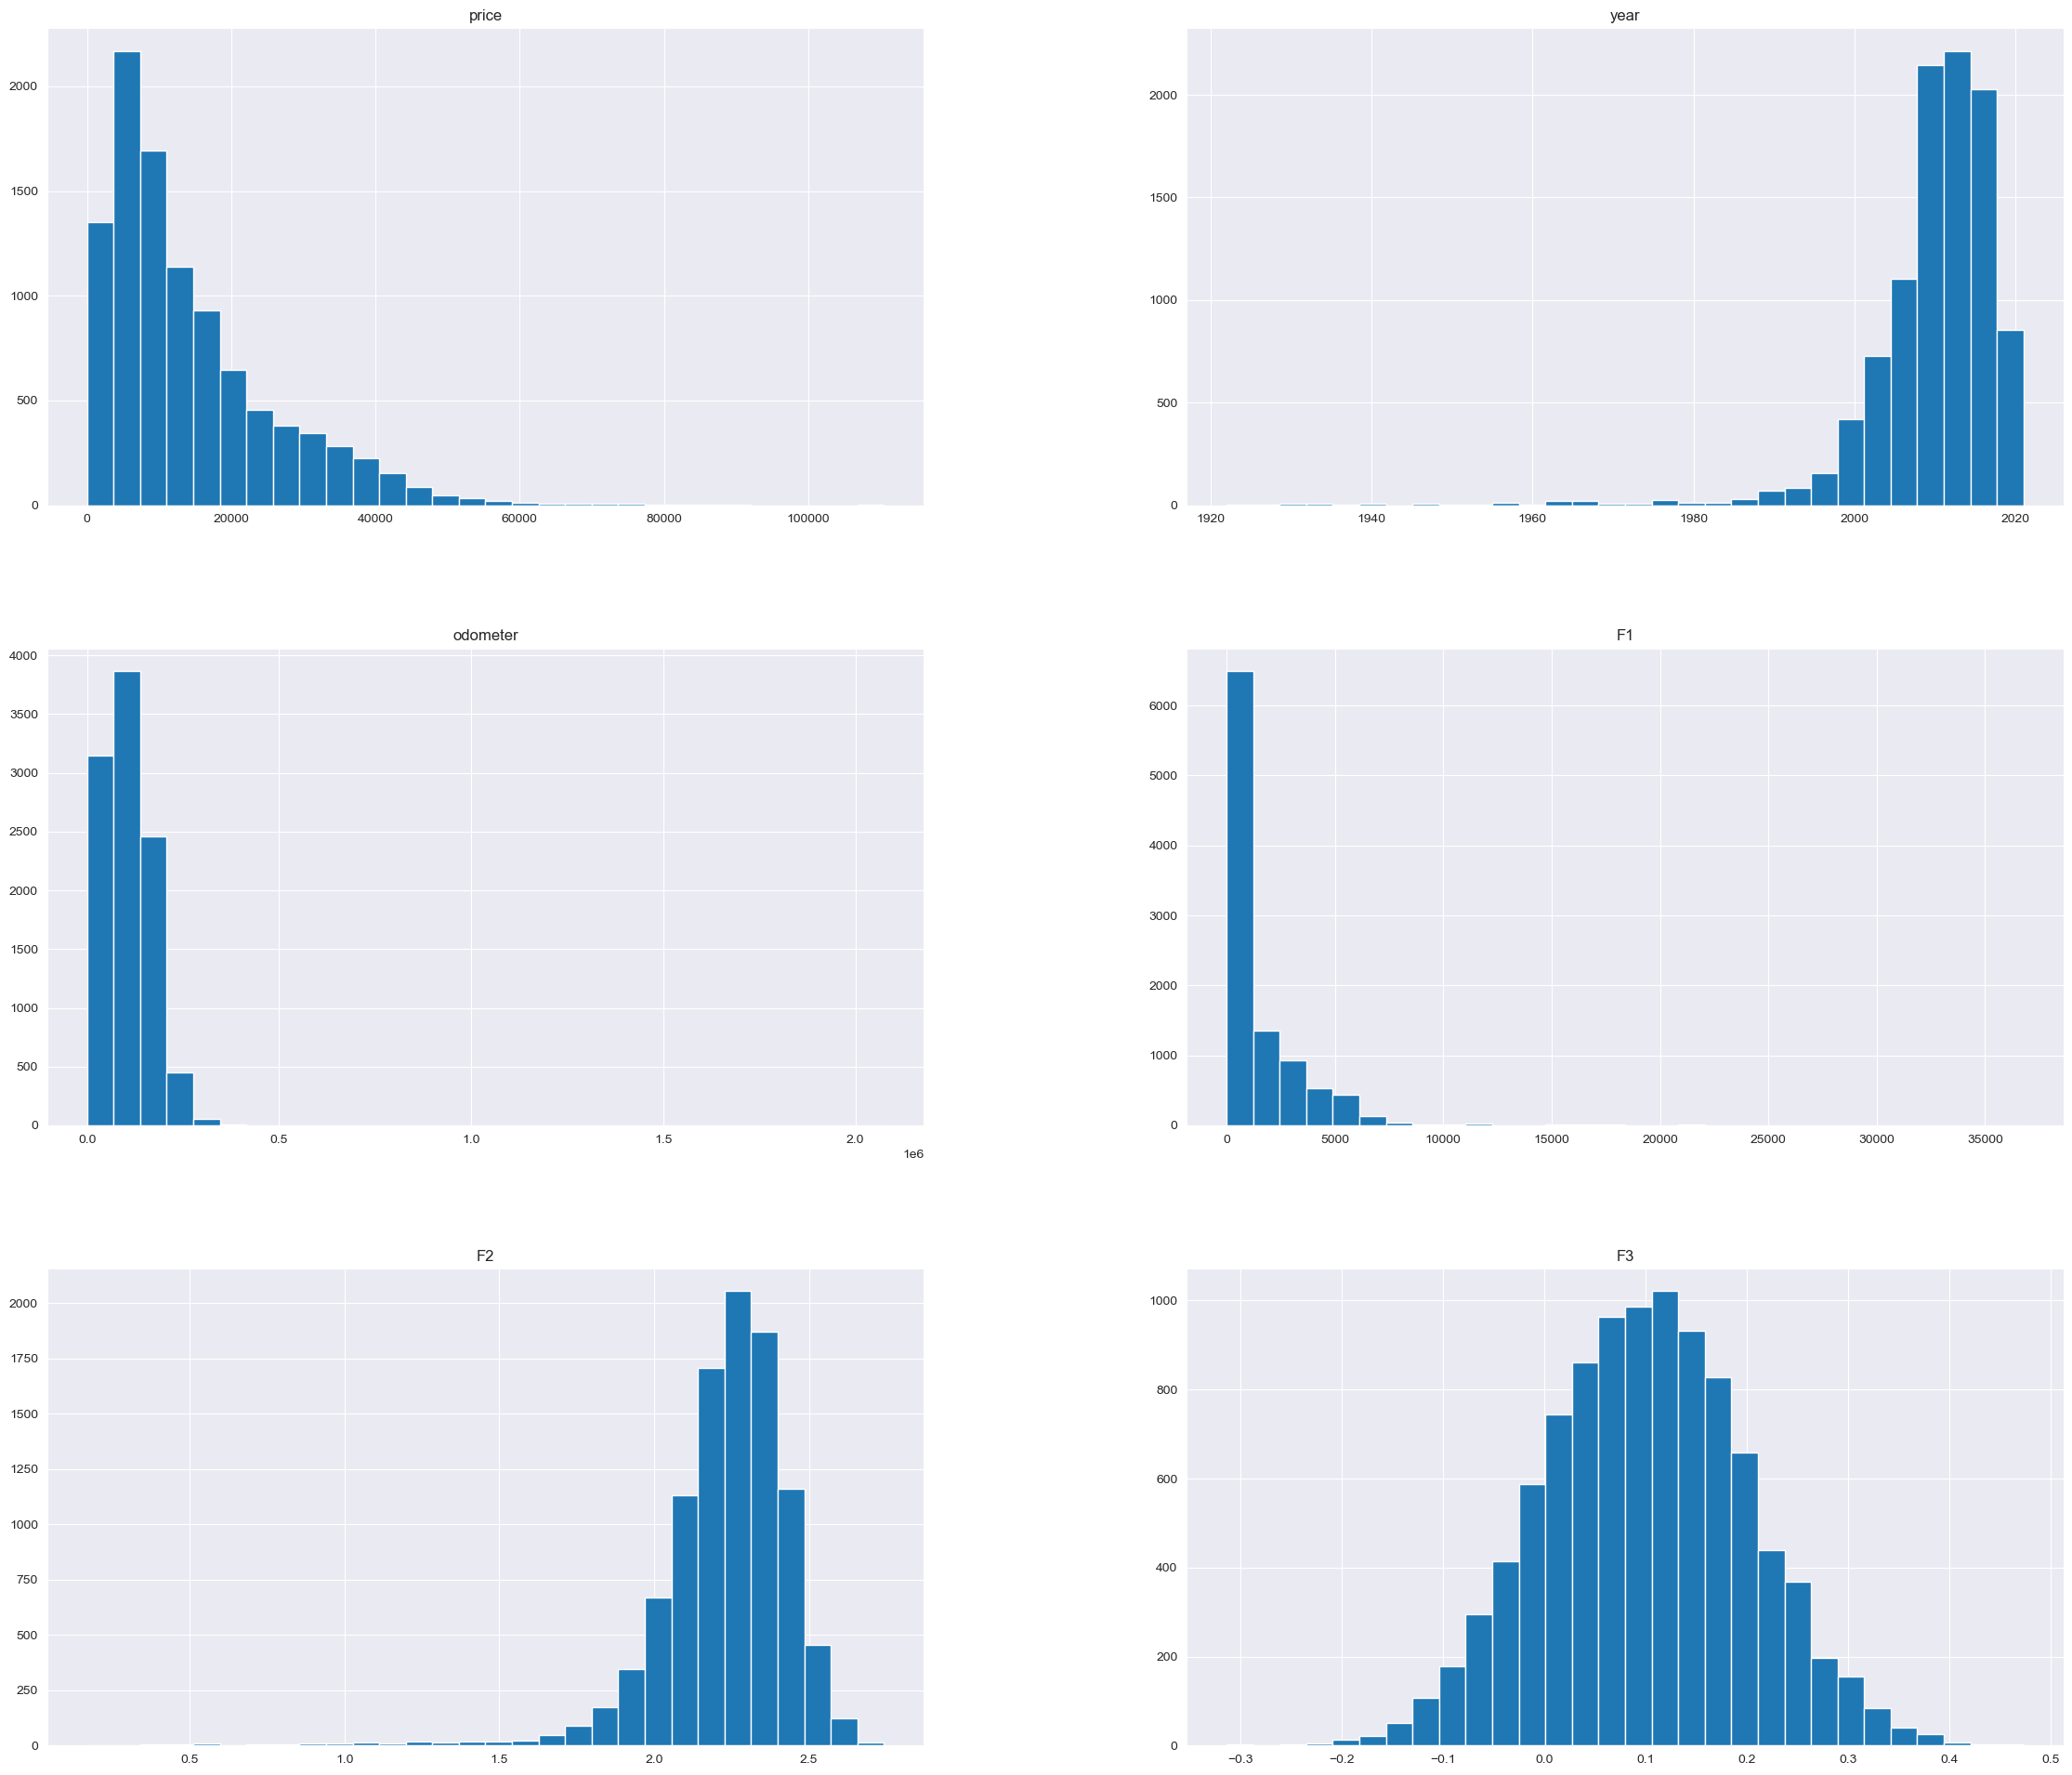

In [55]:
dataset[['price', 'year', 'odometer', 'F1', 'F2', 'F3']].hist(bins=30, figsize=(28, 24))
plt.show()

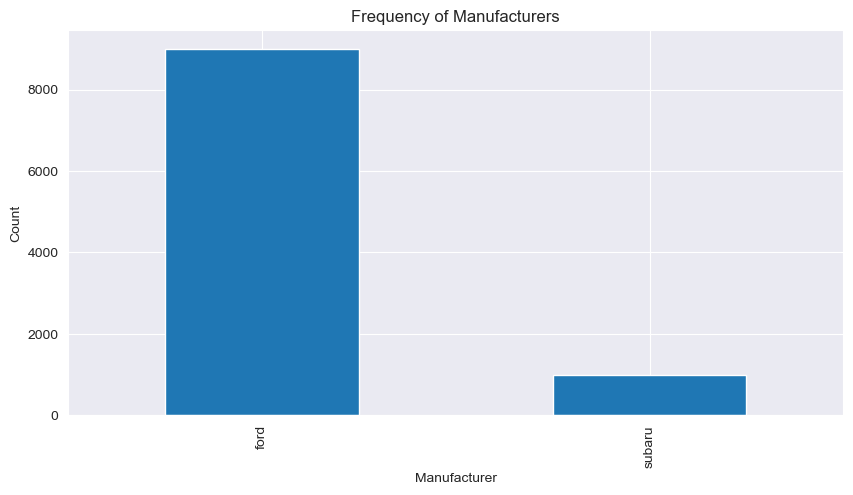

In [45]:
plt.figure(figsize=(10, 5))
dataset['manufacturer'].value_counts().plot(kind='bar')
plt.title("Frequency of Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.show()

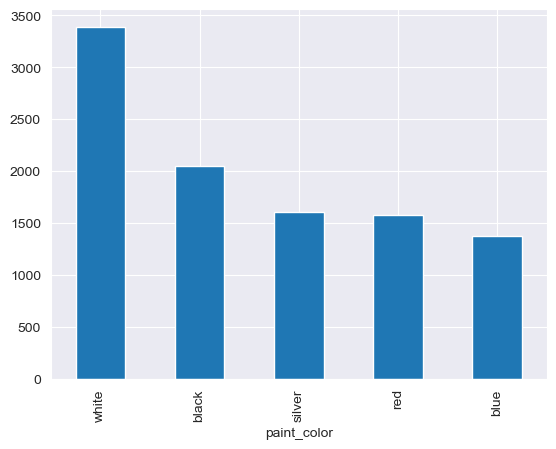

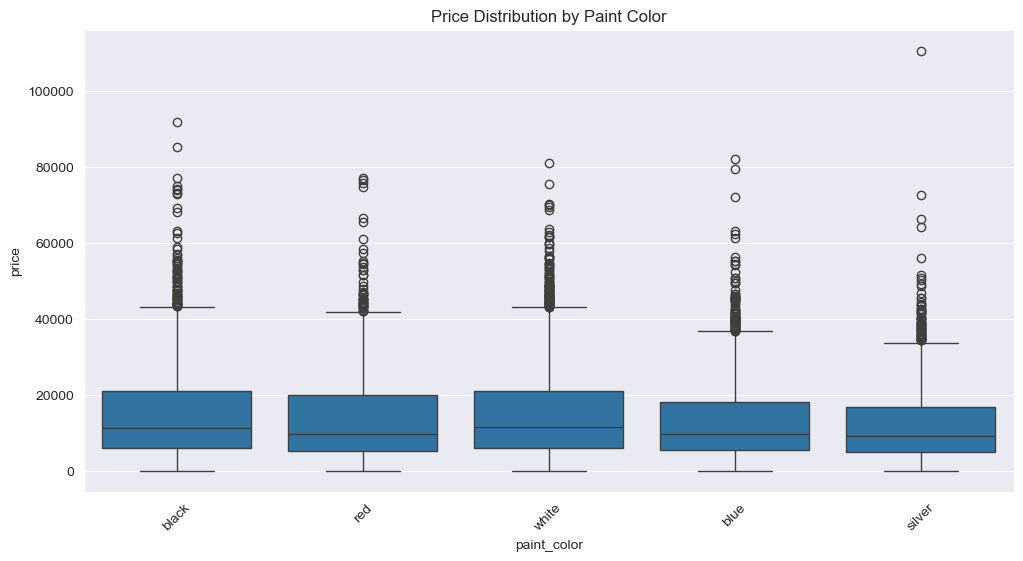

Kruskal-Wallis H-statistic: 66.49383279052293, p-value: 1.2464335858555777e-13


In [56]:
dataset['paint_color'].value_counts().plot(kind='bar')

plt.figure(figsize=(12, 6))
sns.boxplot(x='paint_color', y='price', data=dataset.loc[dataset['odometer'] < 400000])
plt.xticks(rotation=45)
plt.title('Price Distribution by Paint Color')
plt.show()

groups = [group['price'].values for name, group in dataset.groupby('paint_color')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_val}")

Based on above analysis paint_color has impact on price. For example black and white cars are slightly more expensive than other colors.

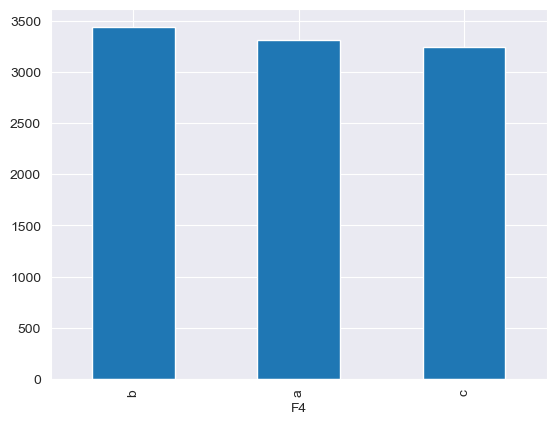

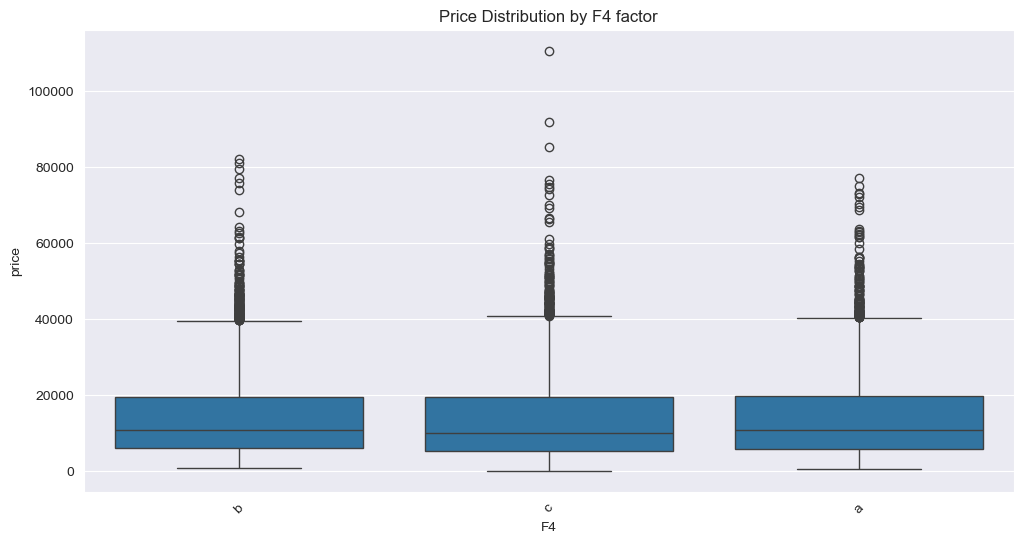

Kruskal-Wallis H-statistic: 6.577461498285556, p-value: 0.03730116389713022


In [57]:
dataset['F4'].value_counts().plot(kind='bar')

plt.figure(figsize=(12, 6))
sns.boxplot(x='F4', y='price', data=dataset.loc[dataset['odometer'] < 400000])
plt.xticks(rotation=45)
plt.title('Price Distribution by F4 factor')
plt.show()

# Group prices by paint_color
groups = [group['price'].values for name, group in dataset.groupby('F4')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_val}")

Low value of Kruskal-Wallis H-statistic: 6.577461498285556, and relatively close to threshold 0.05 p-value: 0.03730116389713022 suggest that F3 factor doesn't have significant impact on price.

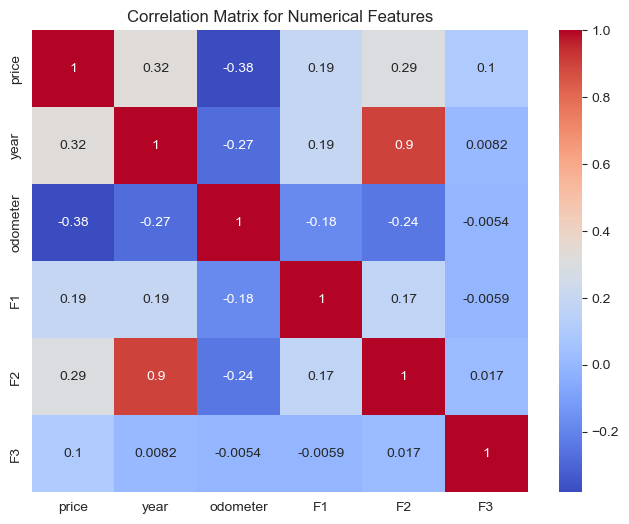

In [50]:
num_cols = ['price', 'year', 'odometer', 'F1', 'F2', 'F3']

corr = dataset[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

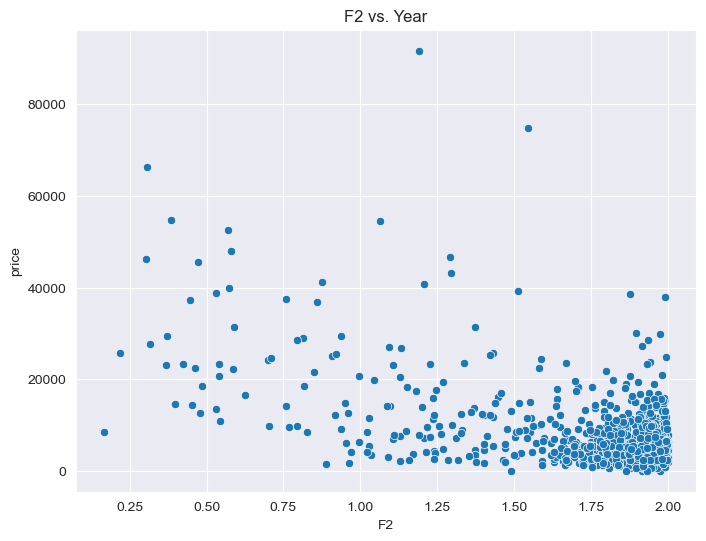

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='F2', y='price', data=dataset.loc[dataset['F2'] < 2])
plt.title("F2 vs. Year")
plt.show()

In [51]:
dataset.fillna(-1, inplace=True)
dataset = dataset.astype({'year': 'int64', 'odometer': 'int64'})

In [52]:
# Encode categorical data
labelEncoder = LabelEncoder()

Based on below analysis price 402498 could be an outlier (mistake made by the user). With that assumption let's remove it from dataset.

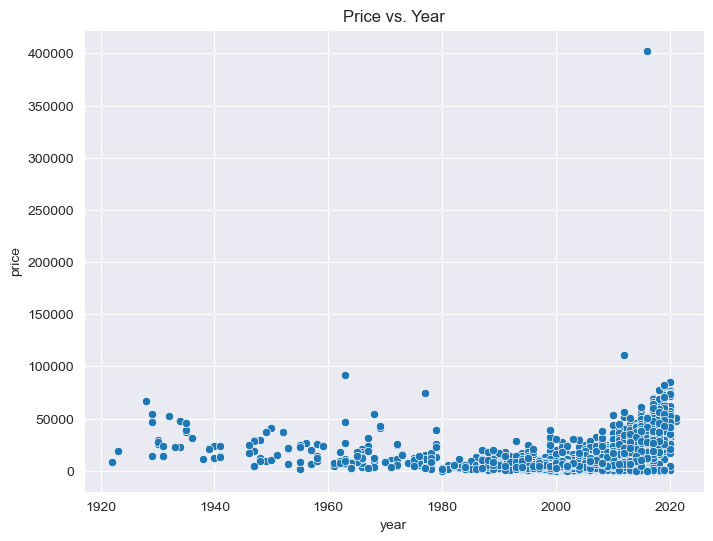

         price  year manufacturer  condition    cylinders  odometer  \
7051  402498.0  2016         ford  excellent  6 cylinders     59000   

     transmission    type paint_color   F1        F2        F3 F4  
7051    automatic  pickup       black  155  2.443044  0.166662  c  


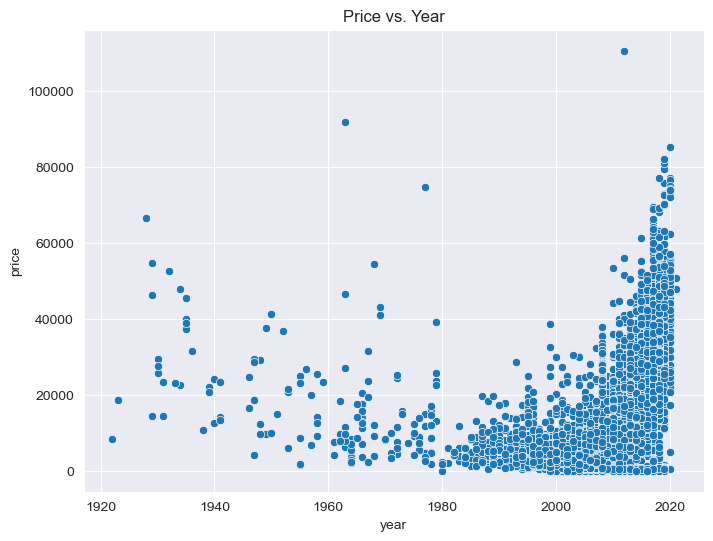

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='price', data=dataset)
plt.title("Price vs. Year")
plt.show()

print(dataset.loc[dataset['price'] > 300000])

dataset = dataset[dataset['price'] < 300000]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='price', data=dataset)
plt.title("Price vs. Year")
plt.show()

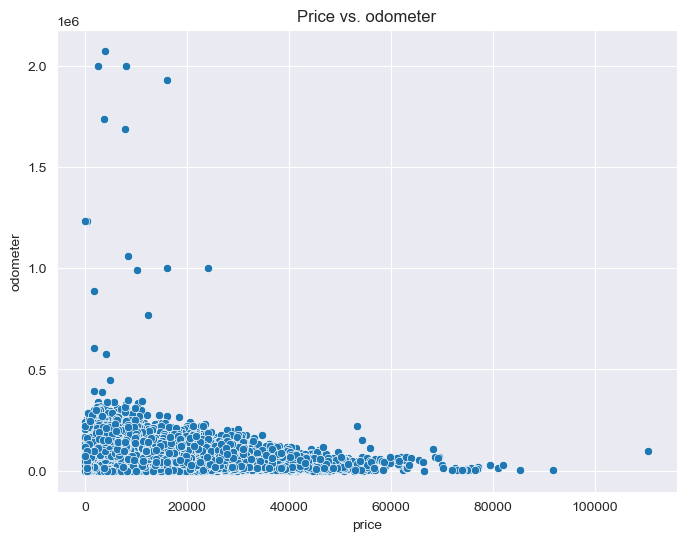

In [54]:
df = dataset.loc[dataset['odometer'] != -1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='odometer', data=df)
plt.title("Price vs. odometer")
plt.show()

## CEO

“The dataset describes conditions of various used cars
and their current prices. I would like to learn what drives price of a used
car. Look at the dataset and find the main factors that affect the value of
a car – and then explain it to me. Additionally, assess the impact of some
special modifications (denoted as F1, F2, F3 and F4 in your dataset) on the
price. This would help us to understand, if we should make the modifications
before selling a car or not. I would like to see a report, describing your main
findings, on my desk, by Friday, March 28.”

> Hint: You are asked to find general trends in the data. Report whatever you think is the
most important. Your CEO doesn’t want to see a list that is 20-items long. She would like
to learn just about some “general trends”. To give you an example, one general trend could
be: “The price decrease with the age of the car. Holding all other factors constant, with
each year, the price of a car decreases by \\$570. However, that dynamics is not constant.
Value of a younger cars decreases faster than the value of an old car. For example, the
value of cars that are less than 5 years old, decreases nearly \\$2,500 per year.”
> (This is just an example, your numbers might be different).
>
> Your second task you have to check both, the impact and the statistical significance of the F1–F4 attributes for making the price
predictions.


## Technical Manager

“I would like you to propose a predictive
model, that can be used to determine price of a used car. The problem is,
that the state-law demands, that this model must be easily interpretable.
It means, we are restricted only to simple models, like linear regression,
Ridge regression, LASSO, or Elastic Net. Additionally, we need to know,
how accurate the model is. You must choose the best model and report its
root means square error. Describe everything in your report. I will study it
carefully.”

> Hint:
In the most typical approach, you need to build three datasets: a training set,
a validation set and a test set. You will use validation set to determine the best model;
then you will use the test set to estimate the model accuracy. In your report you should
describe how you trained the models, how you selected the best one, and how you tested
its performance at the end.

## Senior Developer

“My task is to deploy your model to production. But I can not deploy a paper-report. I need your
code. However, remember that I’m not a Data Scientist like you – I have a
different expertise. I will read your code, but you should make sure that I
can follow and understand it – and that I know how to use it.”

> Hint:
In the ideal case, people should be able to take your code, run it, and recreate all
your results. In a less-ideal case, there should be at least a demonstration of a “typical run”,
demonstrating one selected end-to-end case. Other name for this is a “technical demo”. At
your future work, you might be quite often asked to “demo your results”. People will expect
you to present an end-to-end example, where you read the raw data, train your model and
evaluate the results of the predictions.